# Adult_Census_Income

## Predict whether income exceeds 50K/yr based on census data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
data.shape

(32561, 15)

In [7]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

So there is no missing data. However, there are '?' in dataset. Need to clean the dataset first 

In [9]:
for i in data.select_dtypes(include='object'):
    print(i)
    print(set(data[i]))
    print()

workclass
{'Local-gov', 'Without-pay', 'Self-emp-not-inc', 'Never-worked', 'State-gov', 'Self-emp-inc', '?', 'Private', 'Federal-gov'}

education
{'Preschool', '5th-6th', 'Doctorate', 'Masters', 'Assoc-voc', 'Prof-school', '10th', '11th', 'Assoc-acdm', '1st-4th', '7th-8th', 'HS-grad', '12th', 'Some-college', '9th', 'Bachelors'}

marital.status
{'Married-spouse-absent', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Never-married', 'Married-AF-spouse', 'Separated'}

occupation
{'Machine-op-inspct', 'Protective-serv', 'Transport-moving', 'Prof-specialty', 'Adm-clerical', 'Other-service', 'Tech-support', 'Armed-Forces', '?', 'Priv-house-serv', 'Craft-repair', 'Farming-fishing', 'Sales', 'Handlers-cleaners', 'Exec-managerial'}

relationship
{'Husband', 'Own-child', 'Unmarried', 'Wife', 'Other-relative', 'Not-in-family'}

race
{'White', 'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander', 'Black'}

sex
{'Female', 'Male'}

native.country
{'Cambodia', 'Japan', 'Ecuador', 'Holand-Netherlands', 

So workclass, occupation and native.country have '?'. The easy solution to handle is to delete. But better check if there are too many such records

In [10]:
data[(data['workclass']=='?') |(data['occupation']=='?')|(data['native.country']=='?')].shape

(2399, 15)

So there are around 7% of records with '?'. Not too many, so just delete from the dataset 

In [11]:
data=data[(data['workclass']!='?') &(data['occupation']!='?') &(data['native.country']!='?')]

In [12]:
data.shape

(30162, 15)

There are around 30k of records 

Next is to explore data 

Number of adults with <=50k income: 22654
Number of adults with >50k income: 7508


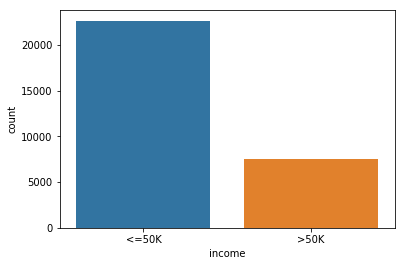

In [13]:
sns.countplot(x='income',data=data)
print('Number of adults with <=50k income: {}'.format(data[data['income']=='<=50K'].shape[0]))
print('Number of adults with >50k income: {}'.format(data[data['income']=='>50K'].shape[0]))

Around a quarter of adults have income higher than 50K.

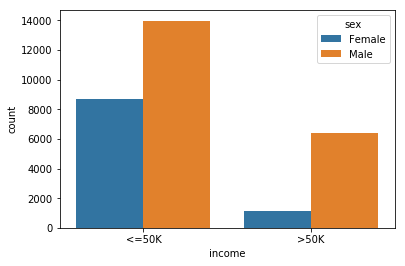

In [14]:
sns.countplot(x='income',hue='sex',data=data)

Another proof of gender difference. The difference of distribution is more significant for female than male.

In [15]:
pd.crosstab(index=data.race,columns=data.income,normalize='index').sort_values(by='>50K',ascending=False)

income,<=50K,>50K
race,,
Asian-Pac-Islander,0.722905,0.277095
White,0.736282,0.263718
Black,0.870075,0.129925
Amer-Indian-Eskimo,0.881119,0.118881
Other,0.909091,0.090909


If your race is either "Asian-Pac-Islander" or "White", there is more than a quarter of chance with income higher than 50K. 
<br>"Black" and "Amer-Indian-Eskimo" only have half chance as "White" or "Asian-Pac-Islander" with income higher than 50K

In [16]:
pd.crosstab(index=data.education,columns=data.income,normalize='index').sort_values(by='>50K',ascending=False)

income,<=50K,>50K
education,,
Prof-school,0.250923,0.749077
Doctorate,0.253333,0.746667
Masters,0.435771,0.564229
Bachelors,0.578509,0.421491
Assoc-voc,0.736802,0.263198
Assoc-acdm,0.746032,0.253968
Some-college,0.799940,0.200060
HS-grad,0.835671,0.164329
12th,0.923077,0.076923


The higher educated, the higher chance one can get over 50K income  

In [17]:
pd.crosstab(data['education.num'],data.income,normalize='index').sort_values(by='>50K',ascending=False)

income,<=50K,>50K
education.num,,
15,0.250923,0.749077
16,0.253333,0.746667
14,0.435771,0.564229
13,0.578509,0.421491
11,0.736802,0.263198
12,0.746032,0.253968
10,0.799940,0.200060
9,0.835671,0.164329
8,0.923077,0.076923


As education.num is highly related to education, therefore similar result can be also obtained by using education.num 

In [18]:
pd.crosstab(data['marital.status'],data.income,normalize='index').sort_values(by='>50K',ascending=False)

income,<=50K,>50K
marital.status,,
Married-AF-spouse,0.523810,0.476190
Married-civ-spouse,0.545041,0.454959
Divorced,0.892738,0.107262
Widowed,0.903265,0.096735
Married-spouse-absent,0.916216,0.083784
Separated,0.929712,0.070288
Never-married,0.951676,0.048324


This can prove "behind every great/successful man there stands a woman"

Next is to build a model and see if we can predict if one gets higher than 50K income 
<br>First is to generate dummy variables for category attributes and seperate independent and dependent variables 

In [19]:
data2=pd.get_dummies(data,drop_first=True)

In [20]:
data2.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
X=data2.drop(['income_>50K'],axis=1)
y=data2['income_>50K']

First step is to split training set and test set 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

### First model is decision tree.

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf = clf.fit(X_train,y_train)

In [25]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_pred= clf.predict(X_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[3912,  621],
       [ 559,  941]], dtype=int64)

In [28]:
clf.score(X_test,y_test)

0.8044090833747721

Even the accuracy score reached 80%, because the dataset is inbalanced, as we can see from confusion matrix, only around 63% of true positive are achieved. Need further improvement 

### Second model is logistic regression

In [29]:
clf2 = LogisticRegression()
clf2 = clf2.fit(X_train,y_train)
y_pred= clf2.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[4369,  164],
       [1127,  373]], dtype=int64)

In [30]:
clf2.score(X_test,y_test)

0.7860102768108735

Even worse than decision tree , in both accuracy score and prediction on income greater than 50K

Next is K Nearest selection. However, it is necessary to normalize numeric attributes before modelling 
<br>First step is to separate train and test data. Then use train data to create a normalized model. Finally is to normalize test data

In [31]:
X=data2.drop(['income_>50K'],axis=1)
y=data2['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [32]:
numeric_variables = list(data2.select_dtypes(include='int64').columns.values)
scaler=StandardScaler()
X_train[numeric_variables] = scaler.fit_transform(X_train[numeric_variables])
X_test[numeric_variables] = scaler.transform(X_test[numeric_variables])

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

### Third is K Nearest Neighbor

In [33]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8261229902204542

In [34]:
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[4070,  463],
       [ 586,  914]], dtype=int64)

In [36]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.87      0.90      0.89      4533
          1       0.66      0.61      0.64      1500

avg / total       0.82      0.83      0.82      6033



Similar to logistic regression. Most true negative data are correctly predicted. However, many true positive data are wrongly predicted.

Last is using neural network

In [37]:
def keralmodel():
    model = Sequential()
    model.add(Dense(48,input_dim=96,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(24,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

estimator=KerasRegressor(build_fn=keralmodel, epochs=30 )

In [38]:
estimator.fit(X_train,y_train)

Epoch 1/30
24129/24129 [==============================] - 1s 43us/step - loss: 0.1506
Epoch 2/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1084
Epoch 3/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1051
Epoch 4/30
24129/24129 [==============================] - 1s 36us/step - loss: 0.1041
Epoch 5/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1035
Epoch 6/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1032
Epoch 7/30
24129/24129 [==============================] - 1s 36us/step - loss: 0.1026
Epoch 8/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1021
Epoch 9/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1016
Epoch 10/30
24129/24129 [==============================] - 1s 34us/step - loss: 0.1010
Epoch 11/30
24129/24129 [==============================] - 1s 36us/step - loss: 0.1006
Epoch 12/30
24129/24129 [===========================

In [39]:
y_predict=estimator.predict(X_test)
y_predict_2 = np.array([( lambda x : 1 if x > 0.5 else 0 )(xi) for xi in y_predict])
accuracy_score(y_test,y_predict_2)

0.8499917122492956

In [40]:
confusion_matrix(y_test,y_predict_2)

array([[4188,  345],
       [ 560,  940]], dtype=int64)

In [41]:
print(classification_report(y_test,y_predict_2))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90      4533
          1       0.73      0.63      0.68      1500

avg / total       0.84      0.85      0.85      6033

